# Satellite Image Classification

![](https://cff2.earth.com/uploads/2019/08/09193739/satellite-67718_1280-960x640.jpg)

[Image Source](https://www.earth.com/earthpedia-articles/how-many-satellites-in-space-do-we-know-about/)

The "Satellite Image Classification" dataset on Kaggle is a collection of satellite images labeled with classes such as "Cloudy", "Desert", "Green_Area", and "Water". The data is made up of satellite images of size 256x256, and can be used for computer vision tasks such as image classification.

# Satellite Image Classification Model

---

# Data Pre-processing:

In [2]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'/kaggle/input/satellite-image-classification/data/cloudy' : 'Cloudy',
          '/kaggle/input/satellite-image-classification/data/desert' : 'Desert',
          '/kaggle/input/satellite-image-classification/data/green_area' : 'Green_Area',
          '/kaggle/input/satellite-image-classification/data/water' : 'Water',
           }

In [3]:
# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)

In [4]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
# Load the dataset
df = pd.read_csv("/kaggle/working/image_dataset.csv")

In [7]:
df

,image_path,label
0,/kaggle/input/satellite-image-classification/d...,Cloudy
1,/kaggle/input/satellite-image-classification/d...,Cloudy
2,/kaggle/input/satellite-image-classification/d...,Cloudy
3,/kaggle/input/satellite-image-classification/d...,Cloudy
4,/kaggle/input/satellite-image-classification/d...,Cloudy
...,...,...
5626,/kaggle/input/satellite-image-classification/d...,Water
5627,/kaggle/input/satellite-image-classification/d...,Water
5628,/kaggle/input/satellite-image-classification/d...,Water
5629,/kaggle/input/satellite-image-classification/d...,Water


In [8]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")


Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


# Deep Learning Model

In [10]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
141/141 [==============================] - 117s 762ms/step - loss: 0.6391 - accuracy: 0.7043 - val_loss: 0.4667 - val_accuracy: 0.8021
Epoch 2/5
141/141 [==============================] - 74s 524ms/step - loss: 0.4643 - accuracy: 0.8055 - val_loss: 0.4155 - val_accuracy: 0.8128
Epoch 3/5
141/141 [==============================] - 73s 520ms/step - loss: 0.4016 - accuracy: 0.8424 - val_loss: 0.3182 - val_accuracy: 0.8767
Epoch 4/5
141/141 [==============================] - 73s 519ms/step - loss: 0.3823 - accuracy: 0.8510 - val_loss: 0.3213 - val_accuracy: 0.8678
Epoch 5/5
141/141 [==============================] - 73s 517ms/step - loss: 0.3656 - accuracy: 0.8539 - val_loss: 0.3032 - val_accuracy: 0.8802


In [13]:
num_samples = test_df.shape[0]
num_samples

1127

In [14]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 3s 82ms/step - loss: 0.3032 - accuracy: 0.8802


In [15]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1466e5cb10>>

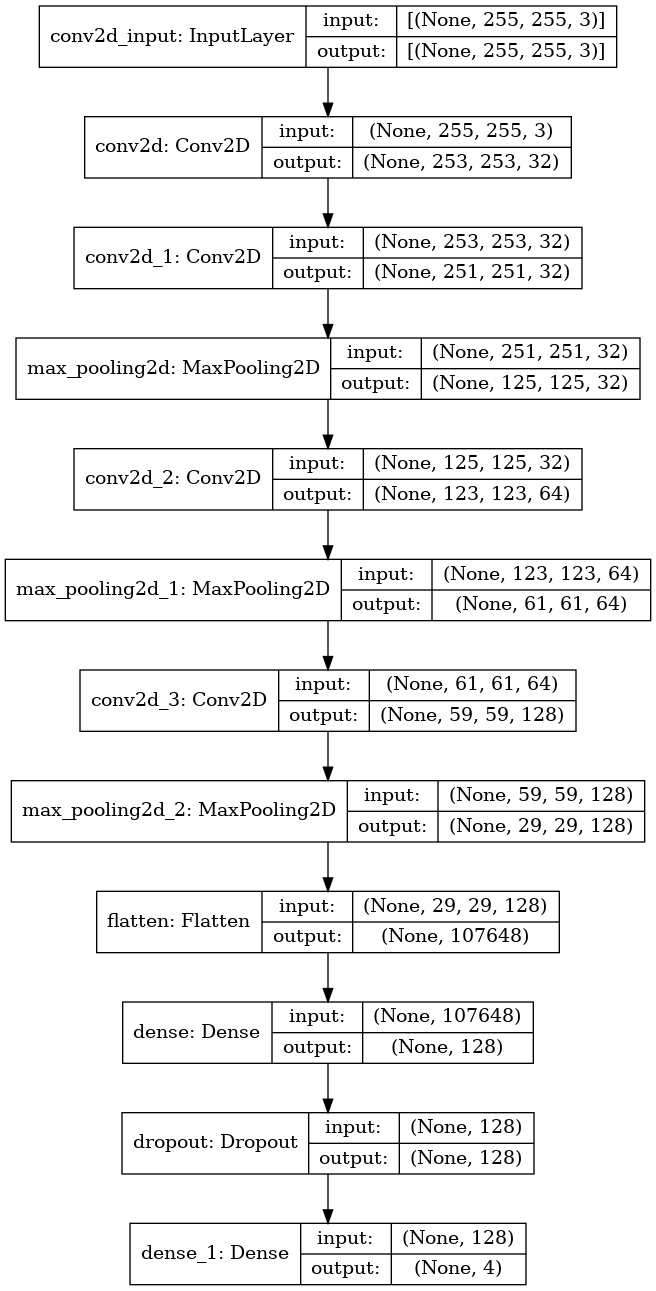

In [16]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

# Loss & Accuracy Visualizations

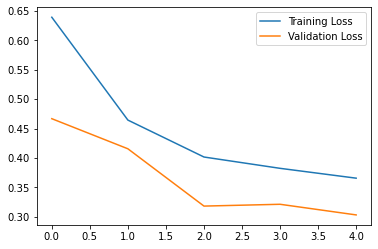

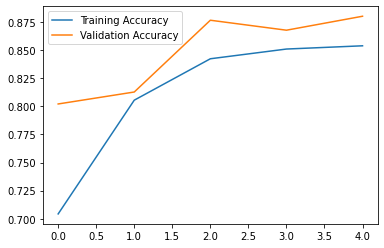

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving Our Model

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

In [19]:
# Load the model
model = load_model("Model.h5")

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [21]:
# Load an image from the test set
img = load_img("/kaggle/input/satellite-image-classification/data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [22]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[32., 61., 67.],
        [32., 61., 67.],
        [32., 61., 67.],
        ...,
        [40., 64., 74.],
        [40., 64., 74.],
        [40., 64., 74.]],

       [[32., 61., 67.],
        [32., 61., 67.],
        [32., 61., 67.],
        ...,
        [40., 64., 74.],
        [40., 64., 74.],
        [40., 64., 74.]],

       [[32., 61., 67.],
        [32., 61., 67.],
        [32., 61., 67.],
        ...,
        [40., 64., 74.],
        [40., 64., 74.],
        [40., 64., 74.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [23]:
img_array.shape

(255, 255, 3)

In [24]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        ...,
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ]],

       [[0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        ...,
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ]],

       [[0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        ...,
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [25]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

# Using Our Model For Predictions

In [26]:
# Get the model predictions
predictions = model.predict(img_array)

In [27]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [29]:
predictions = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [30]:
predictions

array([[8.0139207e-04, 5.5459077e-06, 5.5987126e-01, 4.3932185e-01],
       [9.9875712e-01, 9.0652070e-04, 6.3013095e-11, 3.3637209e-04],
       [4.9140103e-06, 3.0116033e-07, 4.2202063e-03, 9.9577457e-01],
       ...,
       [3.6856813e-06, 2.1734914e-07, 2.0141713e-03, 9.9798191e-01],
       [3.6388505e-01, 6.3584805e-01, 1.0325809e-05, 2.5652742e-04],
       [6.0415088e-04, 5.1848851e-06, 5.8261204e-01, 4.1677868e-01]],
      dtype=float32)

In [31]:
actual_labels = test_generator.classes

In [32]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([2, 0, 3, ..., 3, 1, 2])

In [33]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [34]:
print(cm)

[[85 70 84 89]
 [68 34 48 77]
 [75 65 61 83]
 [88 63 75 62]]


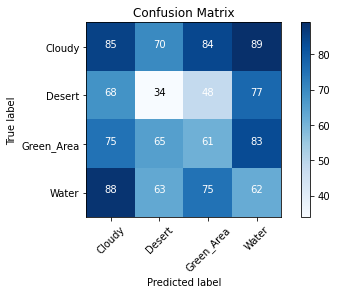

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Advanced Predictions From URLs

In [36]:
from io import BytesIO
import requests
from tensorflow.keras.preprocessing import image
import numpy as np
import tempfile

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

url_list = ['https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg',
            'https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=crop',
            'https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000',
            'https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg',
           ]


for url in url_list:
    response = requests.get(url)
    with tempfile.NamedTemporaryFile(mode='wb') as f:
        f.write(response.content)
        f.seek(0)
        img = image.load_img(f.name, target_size=(255, 255))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)

        classes = model.predict(img, batch_size=10)
        class_index = np.argmax(classes[0])
        predicted_label = class_names[class_index]
        print(url + "The image is predicted to be '{}'.".format(predicted_label))


https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpgThe image is predicted to be 'Desert'.
https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=cropThe image is predicted to be 'Water'.
https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000The image is predicted to be 'Cloudy'.
https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpgThe image is predicted to be 'Desert'.
